# Lending case study

In [238]:
# Importing necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings 
warnings.filterwarnings('ignore')

In [239]:
#Load the Data
df=pd.read_csv("E:/python/lending_case_study/loan/loan.csv")
df.head()
#loan data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [207]:
df.shape

(39717, 111)

In [240]:
#identify Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [241]:
#Check out missing valueus.
nulvalue=df.isnull().sum()
nulvalue

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<AxesSubplot:ylabel='Count'>

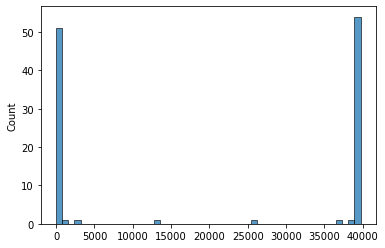

In [210]:
#Plot histogram to check the null and outlier values number of column range vs null values
sns.histplot(nulvalue,bins=50)

In [242]:
#lets analys the column which are having most null values
nulvalue.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12940
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [243]:
#Lets drop null value column as these column will not be usefull for analysis
df.drop(nulvalue[nulvalue.values > 10000].index, inplace=True, axis=1)

In [244]:
df.shape

(39717, 53)

In [214]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [245]:
#find out the unique values to indentify category and continous column
for i in df.columns:
    print(i,df[i].nunique())

id 39717
member_id 39717
loan_amnt 885
funded_amnt 1041
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_title 28820
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
url 39717
purpose 14
title 19615
zip_code 823
addr_state 50
dti 2868
delinq_2yrs 11
earliest_cr_line 526
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21711
revol_util 1089
total_acc 82
initial_list_status 1
out_prncp 1137
out_prncp_inv 1138
total_pymnt 37850
total_pymnt_inv 37518
total_rec_prncp 7976
total_rec_int 35148
total_rec_late_fee 1356
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34930
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


In [246]:
#we can see the column which are having single value (single value in each column) 
#these does not make any sense so lets drop these as well
unique_cols=df.nunique();

In [233]:
single_value_cols = unique_cols[unique_cols.values == 1]
single_value_cols.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [247]:
#Now lets drop single value cols as from these we cant draw any conclusion
df.drop(single_value_cols.index, inplace=True, axis=1)
df.shape

(39717, 44)

In [248]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Problem statement is to idendtify which loan application is risky so the
fileds which are created after loan application processed are of no use so lets drop these

In [249]:
#lets drop behavioural column which are created post loan application is processed.
beavioral_cols=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',"id","member_id","url","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d",'zip_code']
df.drop(columns=beavioral_cols, inplace=True)

In [250]:
df.shape

(39717, 20)

In [251]:
#lets understand the remaning data.
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,2.000000


In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

Since we can not draw anyrthing from ongoin loan . We need to only consider the fully paid
and charged off for analysis so lets drop these rows

In [253]:
#Lets prepare categorical column for analysis.
df.nunique()

loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_title               28820
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
purpose                    14
title                   19615
addr_state                 50
dti                      2868
pub_rec_bankruptcies        3
dtype: int64

In [257]:
#lets understand the categorical values since for analysis we will doing on the categorical column.
for i in cat_columns:
    print(i,df[i].value_counts())

term  36 months    29096
 60 months    10621
Name: term, dtype: int64
int_rate 10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64
grade B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
sub_grade B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64
home_ownership RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
annual_inc 60000.0    1505
50000.0    1057
40000.0 

In [259]:
#Lets remove rows where loan_status is current
df=df[df.loan_status!='Current']
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0


In [260]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [262]:
#remove percent from rate of interst
#Let's remvoe %
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
df['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [263]:
#Lets define categorical and cont column
for i in df.columns:
    print(i,df[i].nunique())

loan_amnt 870
funded_amnt 1019
funded_amnt_inv 8050
term 2
int_rate 370
installment 15022
grade 7
sub_grade 35
emp_title 28027
emp_length 11
home_ownership 5
annual_inc 5215
verification_status 3
issue_d 55
loan_status 2
purpose 14
title 19297
addr_state 50
dti 2853
pub_rec_bankruptcies 3


In [267]:
#Define categorical column
cat_columns=['term','int_rate','grade','sub_grade','home_ownership','loan_status','purpose'
            ,'emp_length','verification_status','emp_length','issue_d','title','addr_state','pub_rec_bankruptcies']
cont_column=['loan_amnt','funded_amnt','funded_amnt_inv','installment','emp_title','annual_inc','issue_d','dti','title']

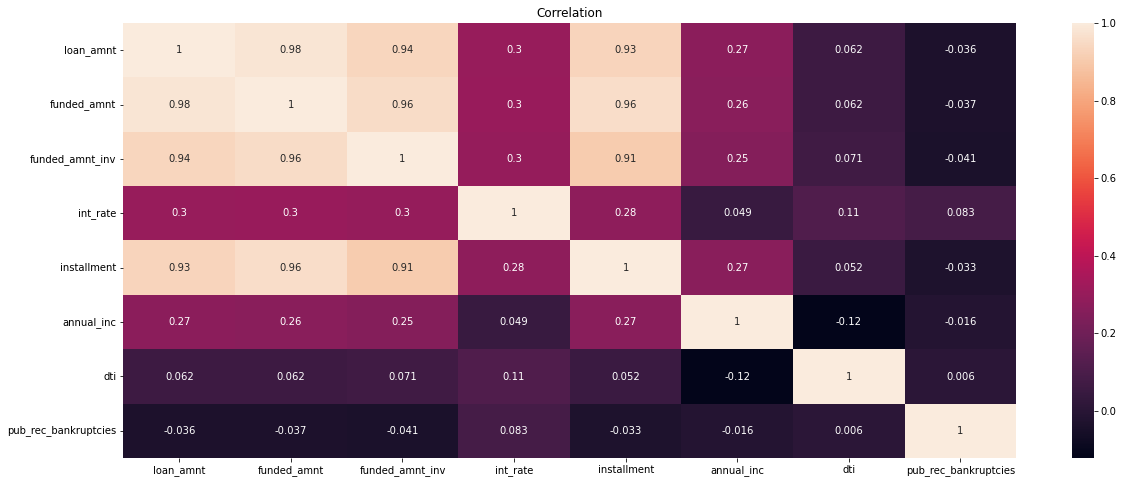

In [269]:
#Heat map based on correlation
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation")
plt.show()

Finding- There are some column whose coorelation is very high lets analyse them.

column having high corelations are ( loan_amnt, funded_amnt, funded_amnt_inv)

1.loan_amnt : the amount for which customer applied

2.funded_amnt: The total amount committed to that loan at that point of sanction.

3.funded_amnt_inv : The total amount committed by investors for that loan at that point in time.

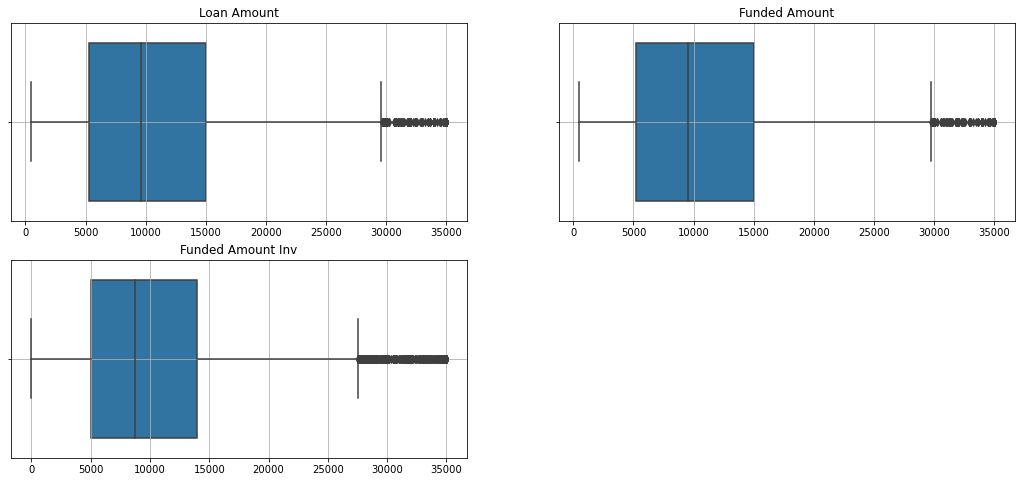

In [272]:
#Subplots for highly correlated columns
f,ax = plt.subplots(2,2,figsize=(18,8))

sns.boxplot(df['loan_amnt'],ax =ax[0,0])
ax[0,0].set_title('Loan Amount')
ax[0,0].set_xlabel('')
ax[0,0].grid("on")
sns.boxplot(df['funded_amnt'],ax =ax[0,1])
ax[0,1].set_title('Funded Amount')
ax[0,1].grid("on")
ax[0,1].set_xlabel('')
sns.boxplot(df['funded_amnt_inv'],ax =ax[1,0])
ax[1,0].set_title('Funded Amount Inv')
ax[1,0].grid("on")
ax[1,0].set_xlabel('')

#Delete extra plot
f.delaxes(ax[1][1])
plt.show()

In [273]:
df.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [274]:
df_shape = df.shape
df_shape

(38577, 18)

In [275]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0


In [276]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [277]:
#Remove months from term
df['term'] = df['term'].apply(lambda x : int(x[:3]))

In [278]:
#After converting the data type to integer , lets see the term column
df[['term']].head(4)

,term
0,36
1,60
2,36
3,36


In [285]:
#convert loan tstut to numeric
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
df['loan_status_num'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [286]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,pub_rec_bankruptcies,loan_status_num
0,5000,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0.0,0
1,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0.0,1
2,2400,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0.0,0
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0.0,0
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0.0,0


Feature Extraction : Business Driven

after data cleanum lets move on to eda

#categorical variable vs cont variable analysis- Loan status vs Numerical continuous variables

In [287]:
# here are some of the global settings/constants that will be referred to within the functions defined below
#colors = ["#fca9a9","#a9fea9"]
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well

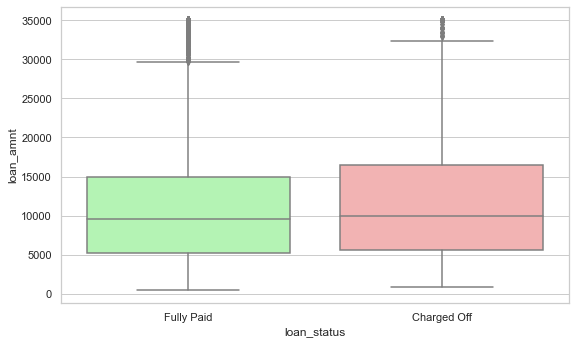

In [290]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)
plt.show()

In [292]:
#Treating outlier
df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

From above analysis it is visisble higher amount tend to write off

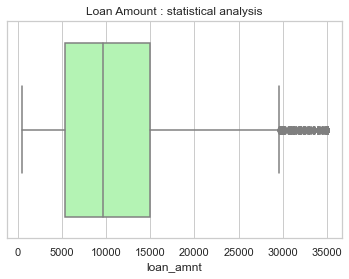

In [306]:
#funded amnt : statistical analysis
sns.boxplot(df['loan_amnt'])
plt.title('Loan Amount : statistical analysis')
plt.show()

>Most Loan Amount lies between 5K to 15K and there seems to be some outlier lets analyse it<br>
>Min Loan Amount : 500
>Max Loan Amount : 35000

In [308]:
Q1 = df['loan_amnt'].quantile(.25)
Q3 = df['loan_amnt'].quantile(.75)

#InterQuantile Range
IQR = Q3-Q1
IQR

9700.0

In [310]:
#anamolies vs outlier classification
df[df['loan_amnt'] > (Q3+1.5*IQR)]['loan_status'].value_counts() 

Fully Paid     836
Charged Off    252
Name: loan_status, dtype: int64

In [311]:
#percentage of rows it contribute to data set
round((920/df_shape[0])*100,2)

2.38

In [312]:
#there are 920 rows which is outlier , i.e. funded amount is much more than usual amount

# but that is 2.32 % of rows in dataset so we can't drop these rows

In [313]:
#max value is 35000, so let check how many rows there for higher loan amount
df[df['loan_amnt'] == 35000].shape

(601, 19)

In [315]:
#lets analyse for higher value of loan_amnt
len_dataset = df[df['loan_amnt'] == 35000].shape[0]
round((len_dataset/df_shape[0])*100,2)

1.56

In [ ]:
#for max loan amount alos there are 601 rows which contribute to 1.56% of rows so we don't drop it

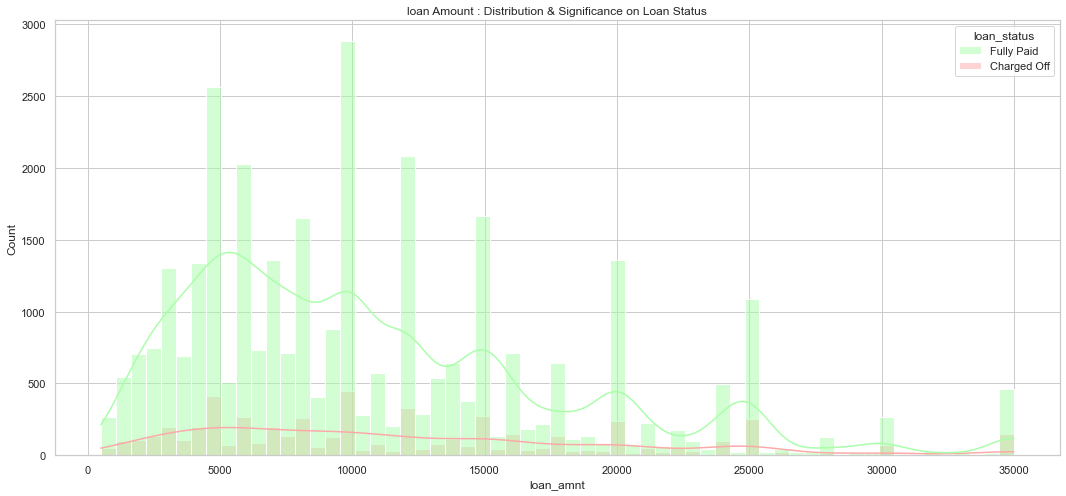

In [316]:
# does the laon amount has any significance on loan default
plt.figure(figsize=(18,8))
sns.histplot(data=df, x='loan_amnt',hue='loan_status',kde=True)
plt.title('loan Amount : Distribution & Significance on Loan Status')
plt.show()

Loan amnt Q1 & Q4 lies between 5000 to 15000 and charged off loans are also max in this range only this may be impact of the data set i.e. higher dataset details are available from here only.

Lets further analyse via segmented Analysis

In [317]:
def segmentedUnivariateAnalysis(data,col):
    df_seg = data.loc[:,[col,'loan_status']]

    derCol= col+'_seg'
    #segment continous variable into quantile segments
    df_seg[derCol] = pd.qcut(df_seg[col],4,labels=['Q1','Q2','Q3', 'Q4'])


    df1 = df_seg.groupby([derCol,'loan_status'])['loan_status'].count().unstack()
    print()
    print()
    print('********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************')

    #plot Frequency distribution
    sns.countplot(df_seg[derCol])
    plt.title(col+': Frequency distribution over each quantile')

    #plot count distribution based on loan status
    f,ax = plt.subplots(1,2,figsize=(18,5))
    sns.pointplot(data = df1, x=df1.index,y='Charged Off',ax=ax[0],color='red')
    ax[0].set_title(col+ ': Charged Off Loan Frequency ')
    sns.pointplot(data = df1, x=df1.index,y='Fully Paid',ax=ax[1],color='green')
    ax[1].set_title(col+ ': Fully Paid Loan Frequency ')

    #plot percentage distribution based on loan status
    df1['Total'] = df1['Charged Off'] + df1['Fully Paid']
    df1['Charged_Off_percentage'] = df1['Charged Off'] / df1['Total']
    df1['Fully_Paid_percentage'] = df1['Fully Paid'] / df1['Total']
    f,ax = plt.subplots(1,2,figsize=(18,5))
    sns.pointplot(data=df1,x=df1.index,y='Charged_Off_percentage',ax=ax[0],color='red')
    ax[0].set_title(col+': Charged Off Percentage over Quantile')
    sns.pointplot(data=df1,x=df1.index,y='Fully_Paid_percentage',ax=ax[1],color='green')
    ax[1].set_title(col+': Fully Paid Percentage over Quantile')
    plt.show()
      #delete temp dataset
    del df1



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


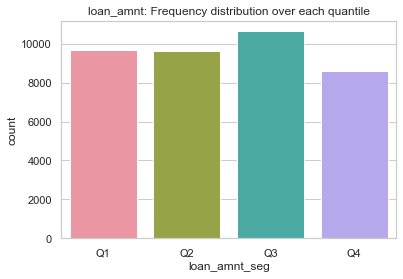

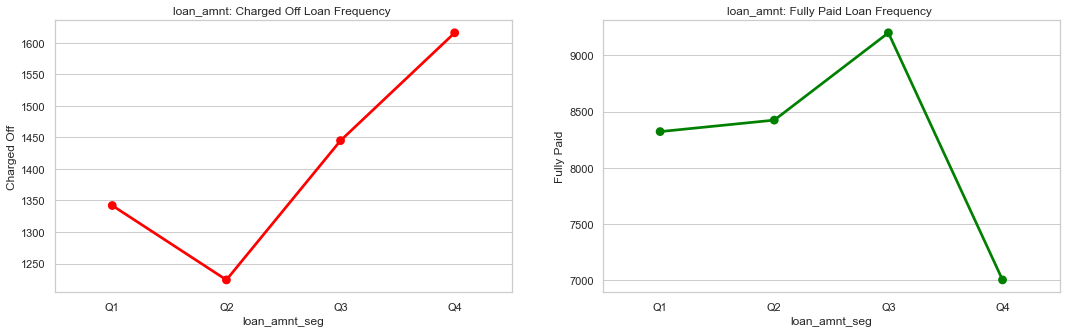

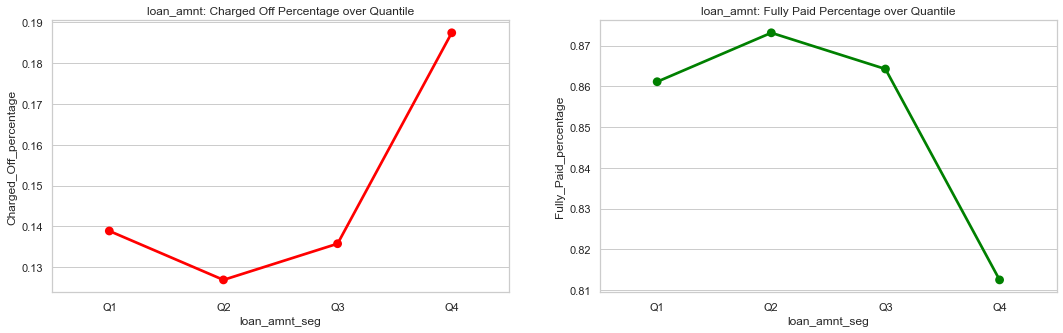

In [318]:
segmentedUnivariateAnalysis(df,'loan_amnt')

In Each Quartile there is almost equal distribution of the Loan Amount Frequency

As Loan Amount Increases, both Charged Off Loan Count and Percentage increases, so Loan_amnt has impact on loan charged off condition

On the other side As loan Amount Increase the Fully Paid loan Percentage decreases

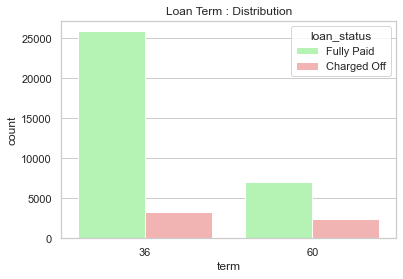

In [323]:
#univariate Analysis
sns.countplot(data=df, x='term', hue='loan_status')
plt.title('Loan Term : Distribution')
plt.show()

Mostly loan is taken for lower term i.e. 36 months

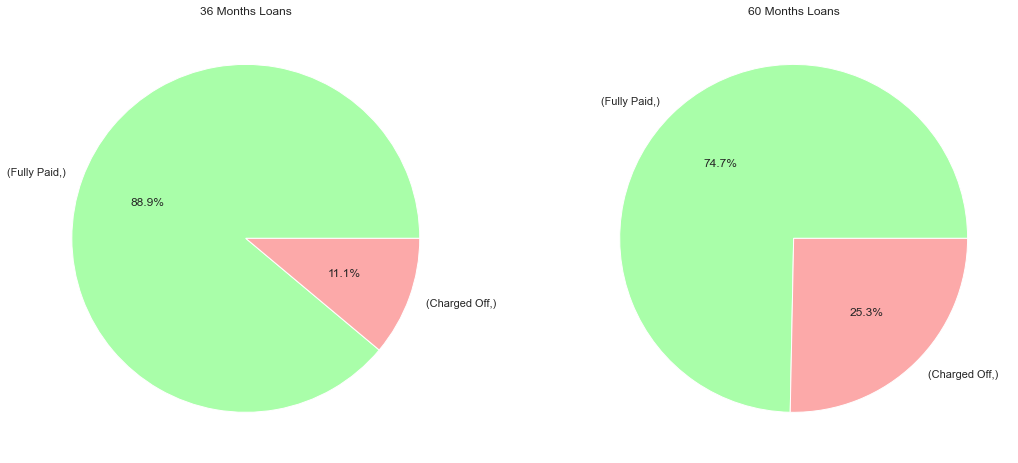

In [328]:
f,ax = plt.subplots(1,2,figsize=(18,8))

term_val = list(df['term'].value_counts().index)
for i,j in enumerate(term_val):
    df[df['term']==j].loc[:,['loan_status']].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(str(j) +' Months Loans')

plt.show()

WE can see the loan is getting defaulted for higher term

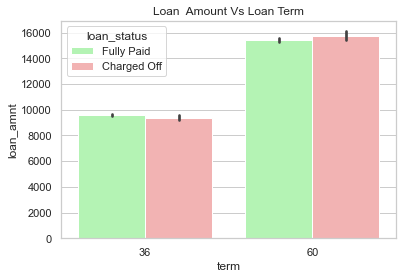

In [330]:
#Bivariate Analysis
sns.barplot(data=df, x='term',y='loan_amnt',hue='loan_status')
plt.title('Loan  Amount Vs Loan Term')
plt.show()

with icrease in loan amount and loan term are increasing the chances of default

continous variable analysis

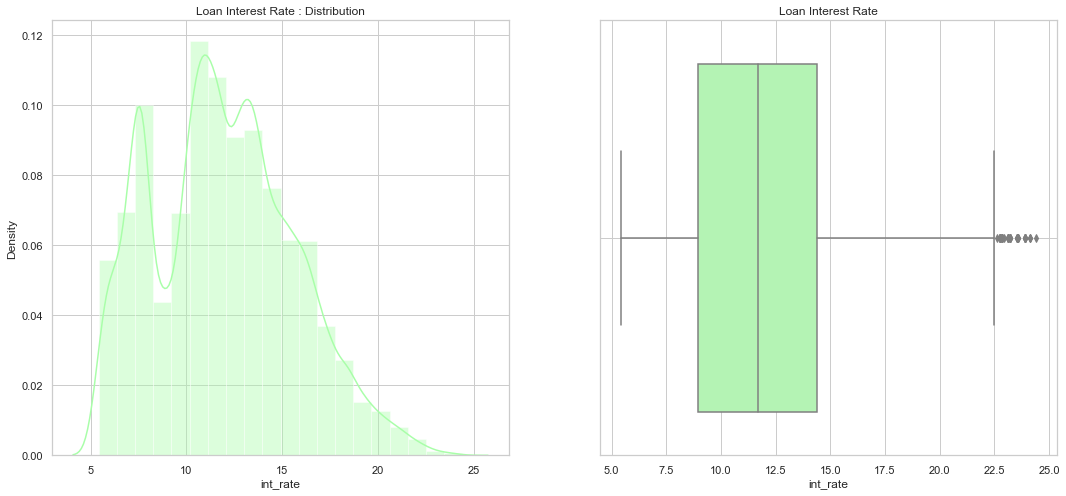

In [442]:
#univariate Analysis
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.distplot(df['int_rate'],kde=True,bins=20,ax=ax[0])
ax[0].set_title('Loan Interest Rate : Distribution')


sns.boxplot(df['int_rate'],ax=ax[1])
ax[1].set_title('Loan Interest Rate')
plt.grid("on")
plt.show()

Most Loans are given on the interest rate of 8.94% to 14.38%

In [335]:
#outlier treatment
#loans greater than 22.5 int_rate
round((len(df[df['int_rate'] >= 22.5])/df_shape[0])*100,2)

0.17

In [336]:
df_shape=df.shape



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


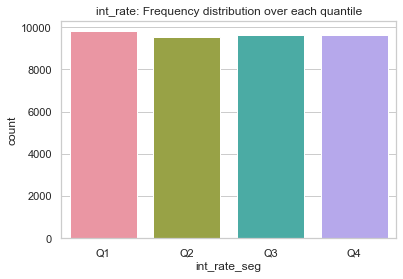

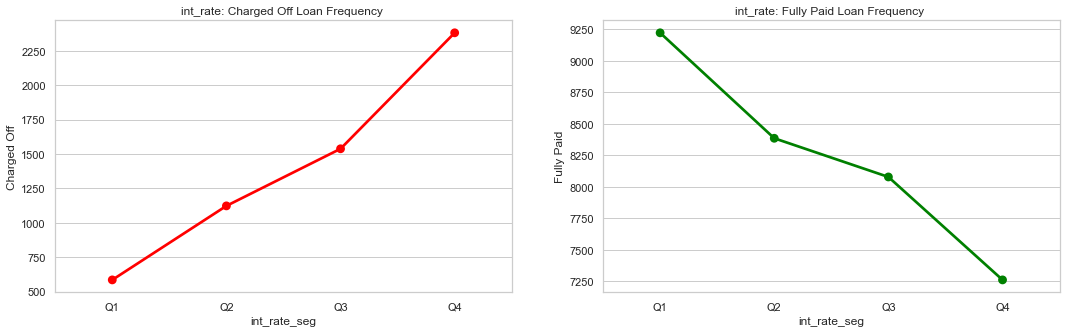

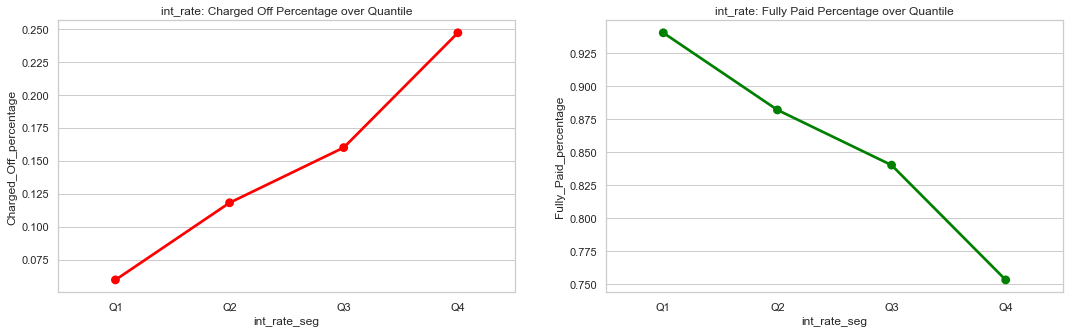

In [338]:
segmentedUnivariateAnalysis(df,'int_rate')

with interest rate increase there is increase in charged off percentage

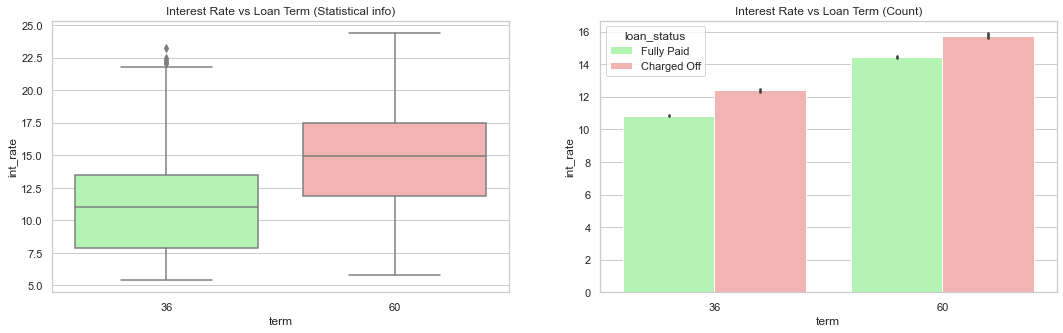

In [340]:
#Bivariate Analysis
f,ax = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(data=df,x='term',y='int_rate',ax=ax[0])
ax[0].set_title('Interest Rate vs Loan Term (Statistical info)')

sns.barplot(data=df, x='term',y='int_rate',hue='loan_status',ax=ax[1])
ax[1].set_title('Interest Rate vs Loan Term (Count)')
plt.show()

60 months loans are given at higher rate and interest rate loans tends more to be charged off loan

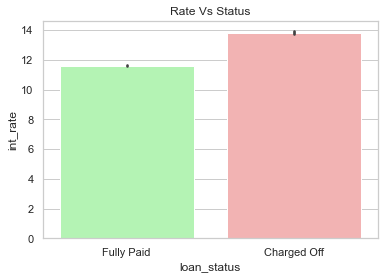

In [343]:
#Bivariate Analysis
sns.barplot(data=df,x='loan_status',y='int_rate')
plt.title('Rate Vs Status')
plt.show()

int_rate between 10 to 15% has highest chance of charged off

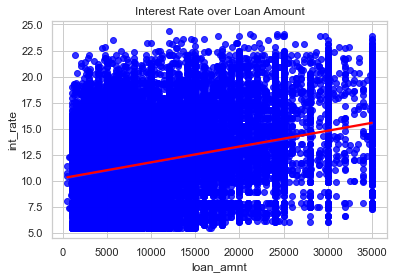

In [355]:
#Bivariate Analysis : int_rate vs loan_amnt

sns.regplot(data=df, x='loan_amnt',y='int_rate',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Interest Rate over Loan Amount')
plt.show()

int_rate incerease with incerease of funded amnt, but there is wide dark spread so 5000 rs loan amnt we can get in different rate of int_rate its not fixed , it will depend on term of loan

Categorical Variable

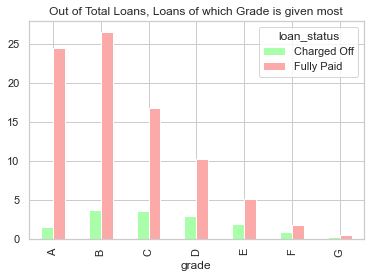

In [356]:
grade_loan = df.groupby(['grade','loan_status'])['loan_status'].count()
grade_loan =  ((grade_loan/df_shape[0])*100).unstack()
#print(grade_loan)
grade_loan.plot.bar()
plt.title('Most Given laons')
plt.show()

Loan of A & B grade are Given most

In [358]:
#function to show charged off percentage in a particular category
def showchargedoffpropation(data,col):
    df = data.groupby([col,'loan_status'])['loan_status'].count().unstack()
    df['Total'] = df['Charged Off'] + df['Fully Paid']
    df['Charged_Off_percentage'] = df['Charged Off'] / df['Total']
    plt.figure(figsize=(18,8))
    sns.barplot(data=df,x=df.index,y='Charged_Off_percentage')
    plt.title('Charged Off Percentage over '+col)
    plt.show()

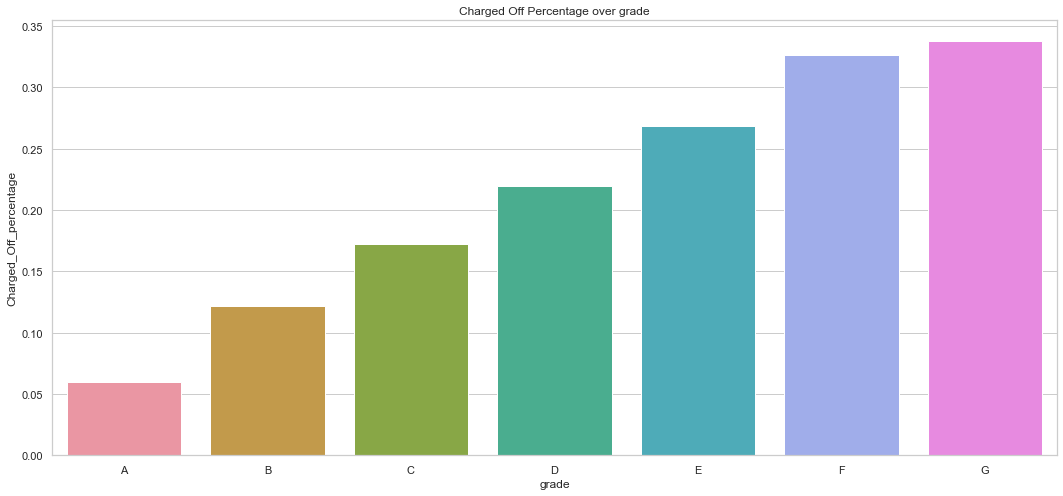

In [359]:
showchargedoffpropation(df,'grade')

Finding

there is a significance of grade on loan charged off ; i.e grade A & B loan is less charged off than grade B , C, D, E


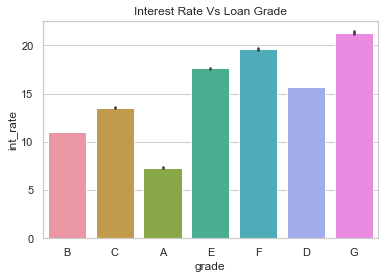

In [362]:
#Bivariate Analysis
#grade vs int_rate
sns.barplot(data=df,x='grade',y='int_rate')
plt.title('Interest Rate Vs Loan Grade')
plt.show()

Higher grade Loans has higher int rate

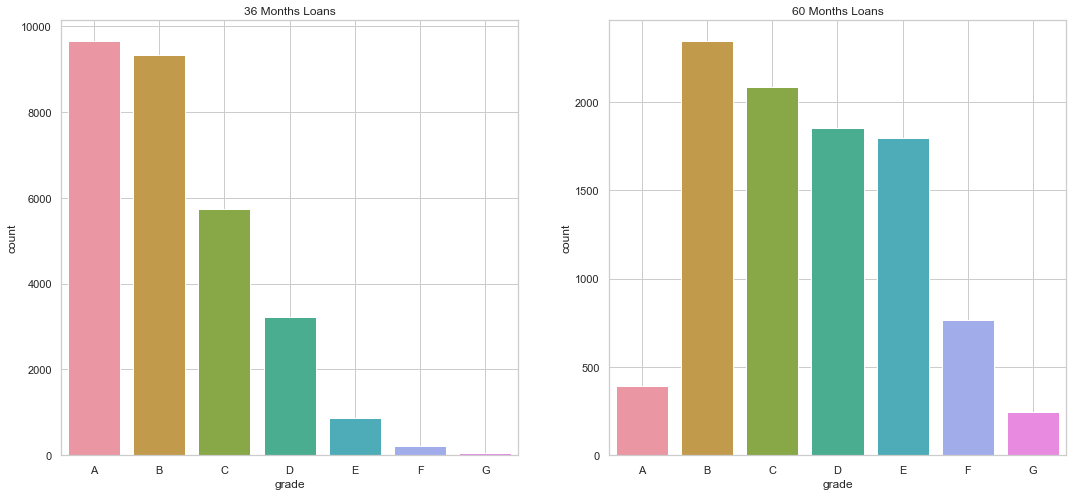

In [365]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=df[df['term']==36],x='grade',ax=ax[0],order='ABCDEFG')
ax[0].set_title('36 Months Loans')
ax[0].grid("on")
sns.countplot(data=df[df['term']==60],x='grade',ax=ax[1],order='ABCDEFG')
ax[1].set_title('60 Months Loans')
ax[1].grid("on")
plt.show()

For 36 month grade A loan is given most

For 60 month grade B loan is given most

Loan count decerease as we go from A->B->C->D->E->F->G

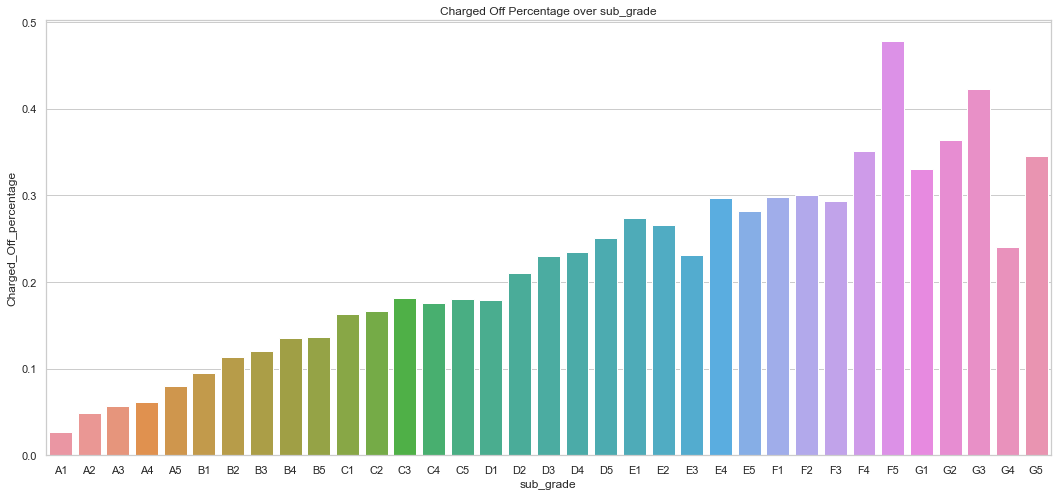

In [368]:
showchargedoffpropation(df,'sub_grade')

Sub_grade show same pattern as of grade Feature over charged off percentag

In [371]:
emp_title_loan = df.groupby(['emp_title','loan_status'])['loan_status'].count().unstack()

In [372]:
emp_title_loan.columns

Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')

In [373]:
emp_title_loan[((emp_title_loan['Charged Off'].isnull() == False) & (emp_title_loan['Fully Paid'].isnull() == False))]

loan_status,Charged Off,Fully Paid
emp_title,,
24 Hour Fitness,1.0,2.0
24 hour fitness,1.0,1.0
3M Company,1.0,1.0
A Touch of Italy,1.0,1.0
ABM,1.0,1.0
...,...,...
walmart,4.0,19.0
wells fargo,3.0,7.0
wells fargo bank,1.0,7.0


There are around 818 rows where person belongs to a company where their is both record of charged as well Fully paid

there are miss spelling of the company name as well e.g well fargo, wells fargo bank

there are 2K missing records

In [374]:
# so lets drop this columns
df.drop(['emp_title'],axis=1,inplace=True)

In [375]:
df.shape

(38577, 18)

In [ ]:
categorical column emp_length

In [377]:
df['emp_length'].isnull().sum()

1033

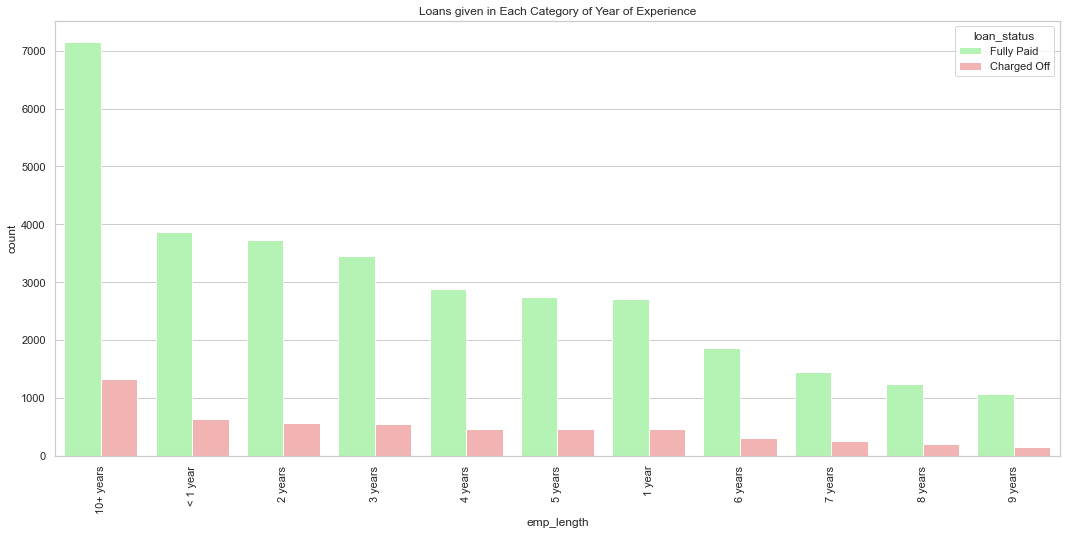

In [379]:
#Univariate Analysis
df_emp = df['emp_length'].value_counts()
plt.figure(figsize=(18,8))
sns.countplot(data = df, x="emp_length",hue='loan_status',order = df_emp.index)
plt.xticks(rotation=90)
plt.title('Loans given in Each Category of Year of Experience')
plt.show()

10+ years people get most loans

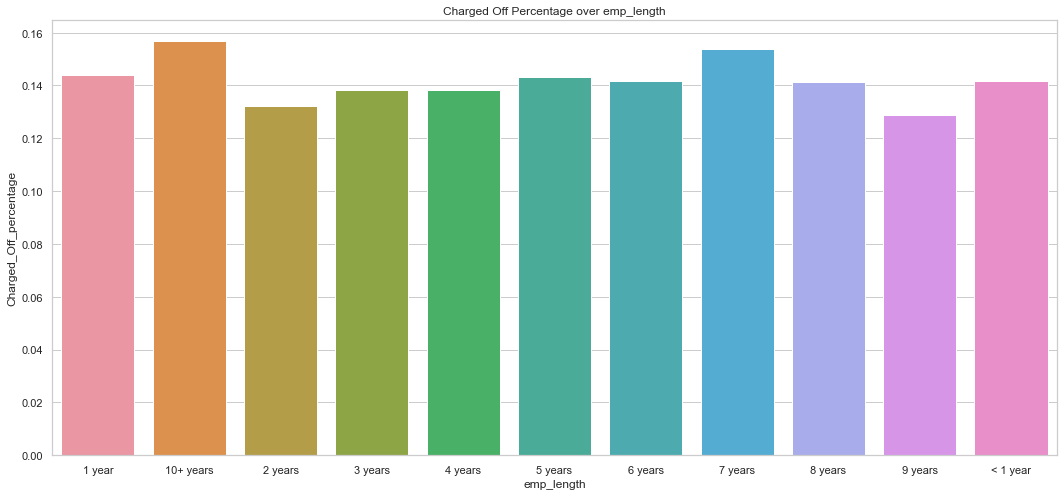

In [381]:
showchargedoffpropation(df,'emp_length')

no impact of no of year of job on charged off

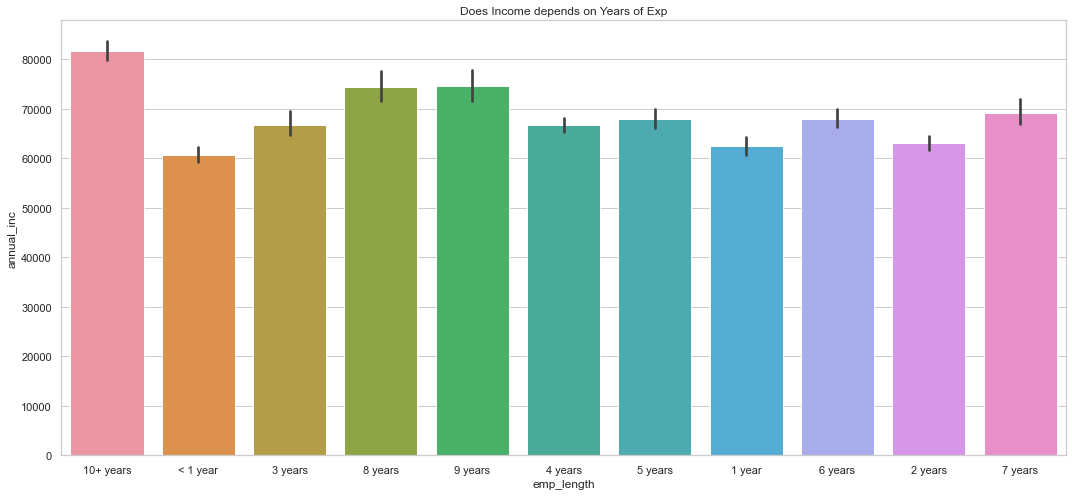

In [382]:
plt.figure(figsize=(18,8))
sns.barplot(data = df, x ='emp_length',y='annual_inc')
plt.title('Does Income depends on Years of Exp')
plt.show()

No impact of salary on no of year of experience

In [384]:
df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [386]:
# Replace Null values with mode value i.e. 10+ years
df['emp_length'] = df['emp_length'].fillna('10+ years')

In [388]:
df['emp_length'].isnull().sum()

0

In [390]:
#Convert emp_length categorical value to numerical value
df['emp_length'] = df['emp_length'].replace(['< 1 year'],['0 Year'])
#extract numbers from string
df['emp_length'] = df['emp_length'].str.extract('(\d+)')
# Feature Extraction ( Type Driven) convert datatype from string to int
df['emp_length'] = df['emp_length'].astype(int)
df['emp_length'].head(2)

0    10
1     0
Name: emp_length, dtype: int32

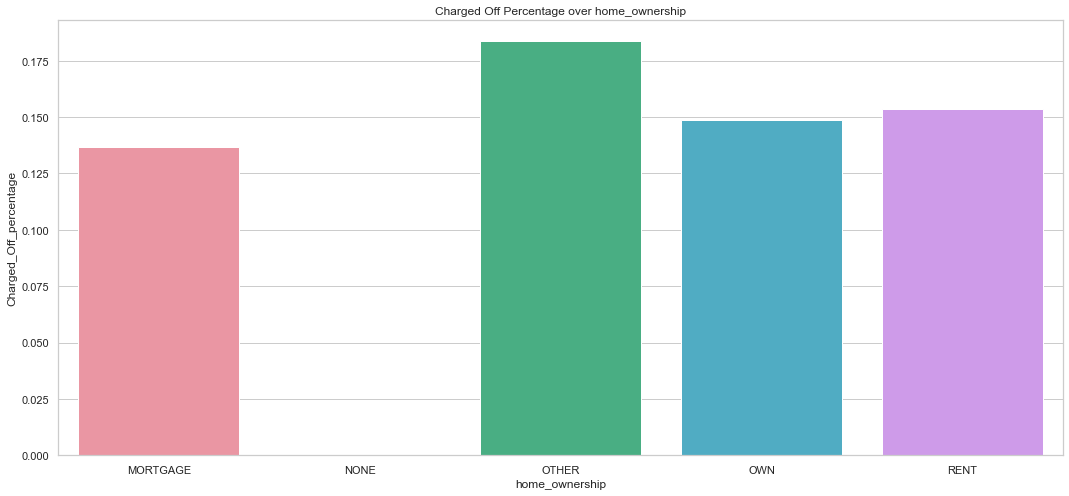

In [392]:
showchargedoffpropation(df,'home_ownership')

There is no significance difference of charged off loans Percentage based on Home Ownership.

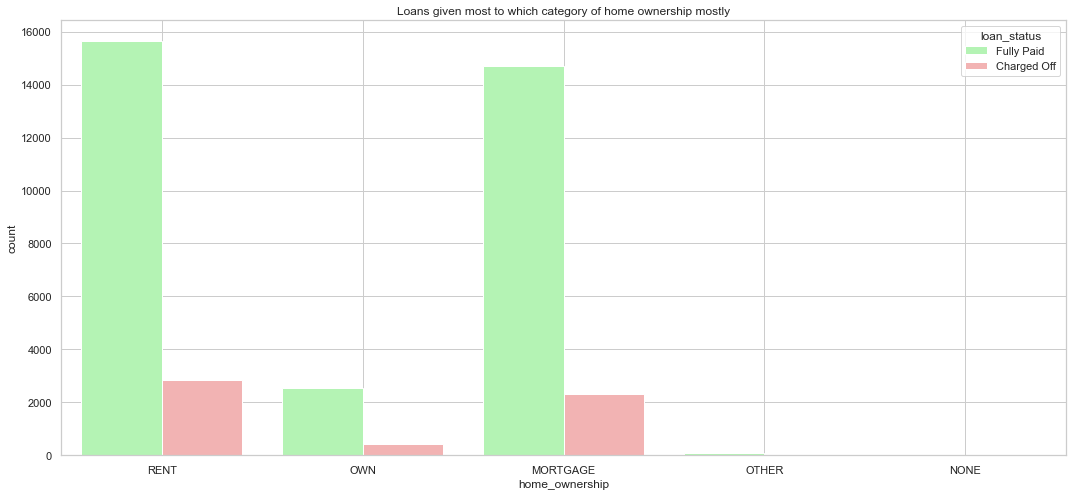

In [394]:
plt.figure(figsize=(18,8))
sns.countplot(data=df,x="home_ownership",hue='loan_status')
plt.grid("on")
plt.title('Loans given most to which category of home ownership mostly')
plt.show()

Borrower having rent or Mortage ownership have taken the loans mostly

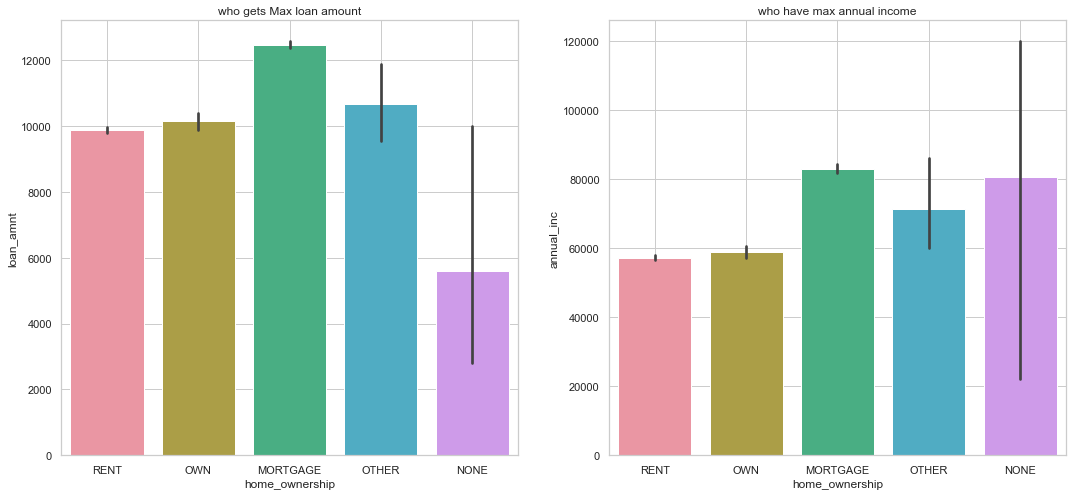

In [396]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.barplot(data=df,x='home_ownership',y='loan_amnt',ax=ax[0],estimator=np.mean)
ax[0].set_title("who gets Max loan amount")
ax[0].grid("on")
sns.barplot(data=df,x='home_ownership',y='annual_inc',ax=ax[1],estimator=np.mean)
ax[1].set_title("who have max annual income")
ax[1].grid("on")
plt.show()

Mortage get the max loan amnt funded

Mortage and None have max annual income

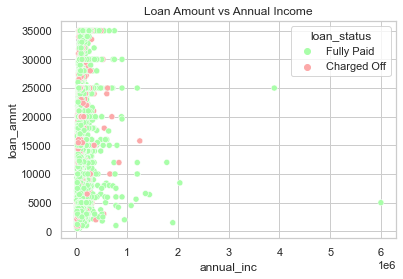

In [397]:
#annual inc vs loan amount
sns.scatterplot(data=df,x='annual_inc',y='loan_amnt',hue='loan_status')
plt.title('Loan Amount vs Annual Income')
plt.show()

Most people getting loan belongs to range of 0 ~ 2 le6 and there are some outliers

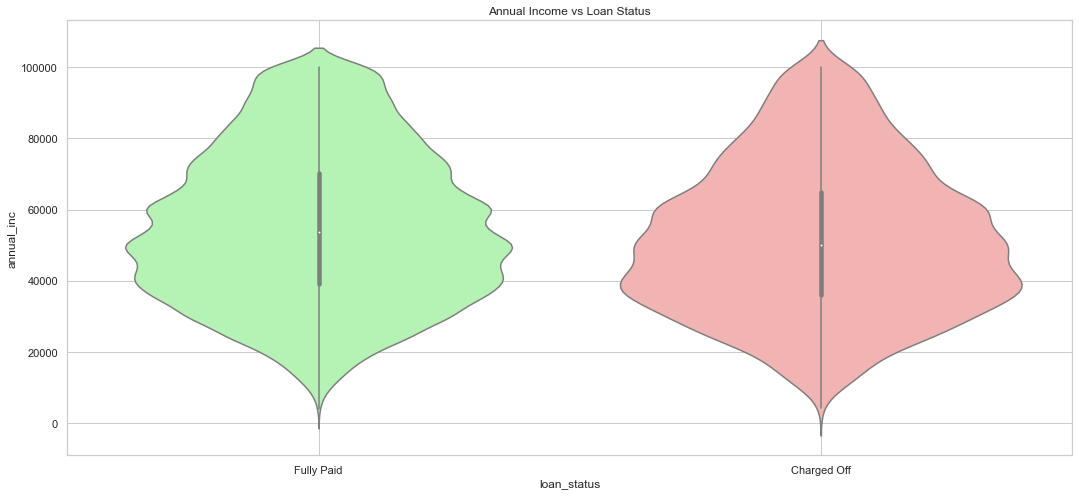

In [408]:
#Bivariavte Analysis
#annual_inc vs loan_status
plt.figure(figsize=(18,8))
sns.violinplot(data=df[df['annual_inc'] <= 100000],x='loan_status',y='annual_inc')
plt.grid("on")
plt.title("Annual Income vs Loan Status")
plt.show()

40K to 60K have highest charged off then -->20k to 40 k --> 60 to 80

verification_status ( Categorical Variable)

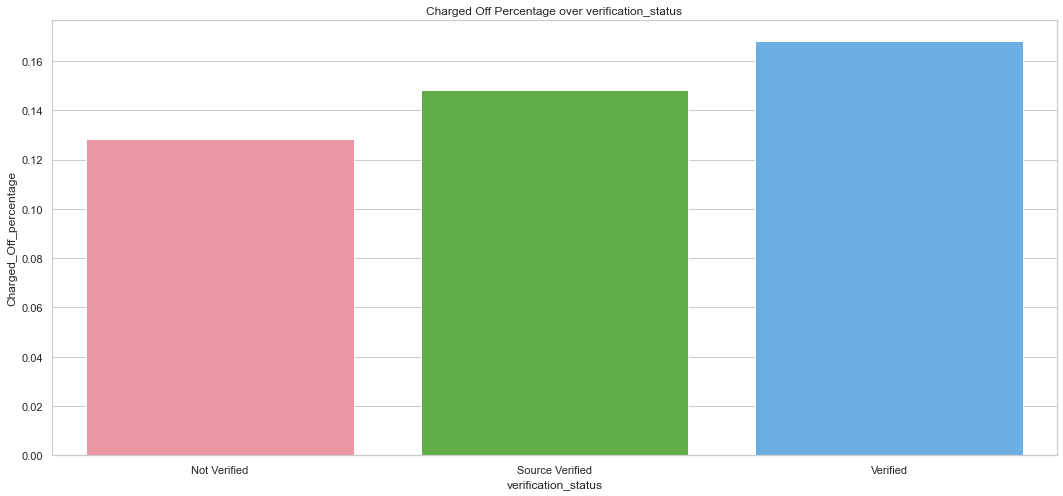

In [411]:
showchargedoffpropation(df,'verification_status')

Verified loan are more charging off than non verified , so need to recheck the verification process

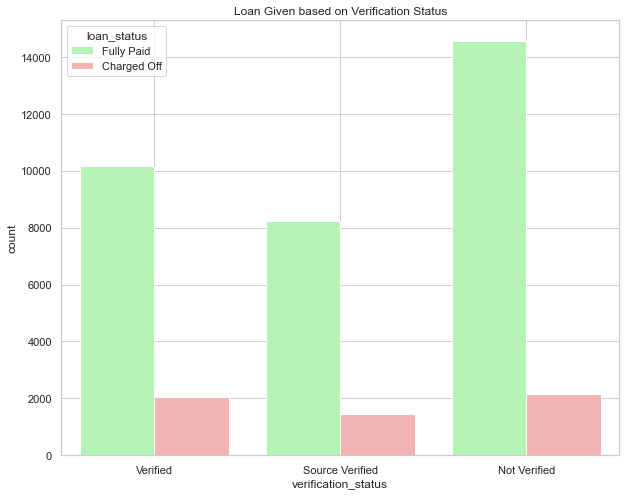

In [412]:
plt.figure(figsize=(10,8))
sns.countplot(data= df , x='verification_status',hue='loan_status')
plt.grid("on")
plt.title('Loan Given based on Verification Status')
plt.show()

Most loans are given to not verified

purpose (Categorical Variable)

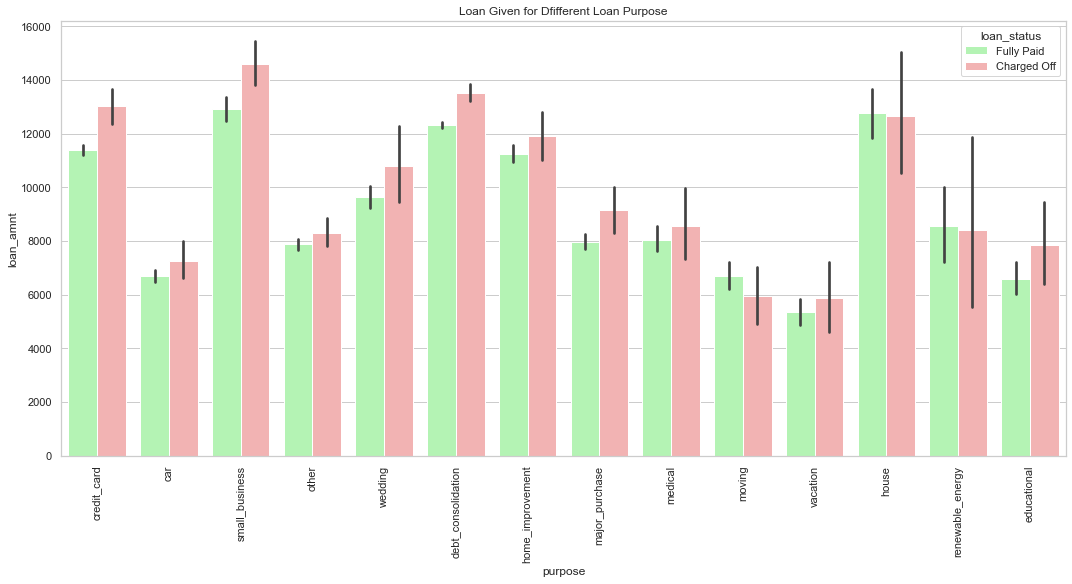

In [413]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='purpose',y='loan_amnt',hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Given for Dfifferent Loan Purpose')
plt.show()

For Purpose : small_business, debt_consolidation, credit_card, house are more contributing to the loan amount

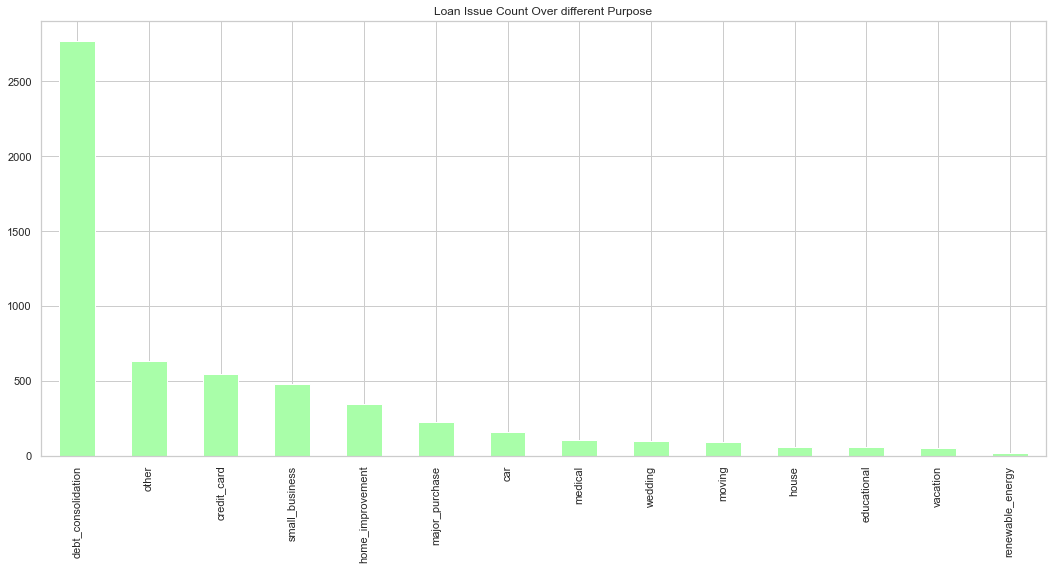

In [415]:
plt.figure(figsize=(18,8))
df[df['loan_status']=='Charged Off']['purpose'].value_counts().plot.bar()
plt.title('Loan Issue Count Over different Purpose')
plt.show()

For other & major_purpose loan amount is less but contributing more to charged off

debt Consolidation,other,credit_card : are most contributing to charged_Off loans

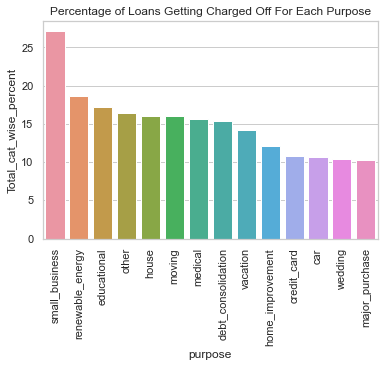

In [417]:
df_purpose = df.groupby(['purpose','loan_status'])['loan_status'].count().unstack()
df_purpose['Total_cat_wise'] = df_purpose['Charged Off'] + df_purpose['Fully Paid']
df_purpose['Total_cat_wise_percent'] = round( (df_purpose['Charged Off'] / df_purpose['Total_cat_wise'])*100,2)
df_purpose= df_purpose.sort_values(by='Total_cat_wise_percent',ascending=False)
sns.barplot(data=df_purpose,y='Total_cat_wise_percent',x=df_purpose.index)
plt.xticks(rotation=90)
plt.title("Percentage of Loans Getting Charged Off For Each Purpose")
plt.show()

out of total loans given for small business , 25% of small business loans are getting charged off

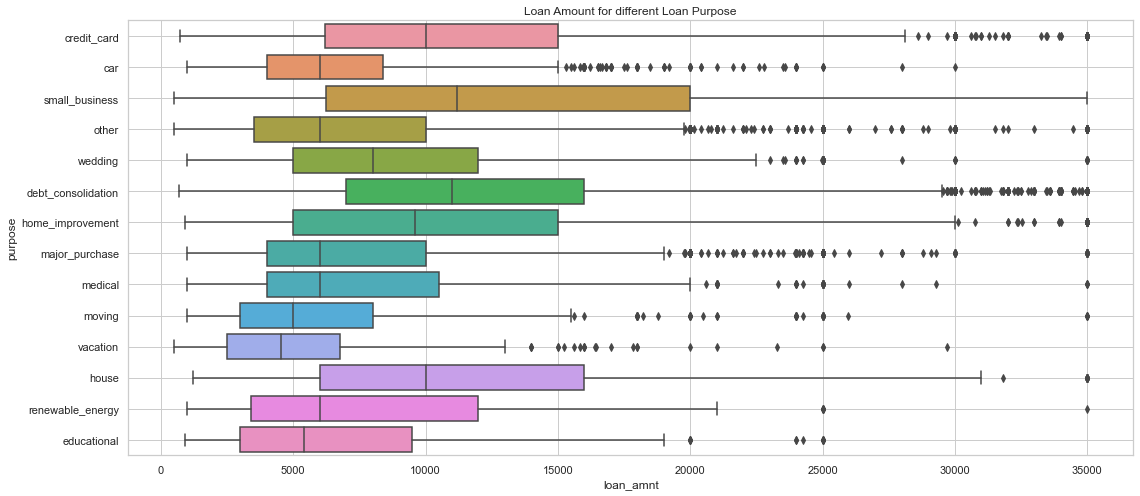

In [418]:
#purpose vs loan Amount
plt.figure(figsize=(18,8))
sns.boxplot(data=df,x='loan_amnt',y='purpose')
plt.title('Loan Amount for different Loan Purpose')
plt.grid("on")
plt.show()

Higher amount of Loan taken for purpose: Credit card, debt, house..

In [421]:
df['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

if we see purpose is divided into sub group and Debt Consolidation, Debt Consolidation Loan, debt consolidation are different values, lets drop this

In [423]:
df.drop(['title'],axis=1,inplace=True)

In [424]:
df_shape=df.shape

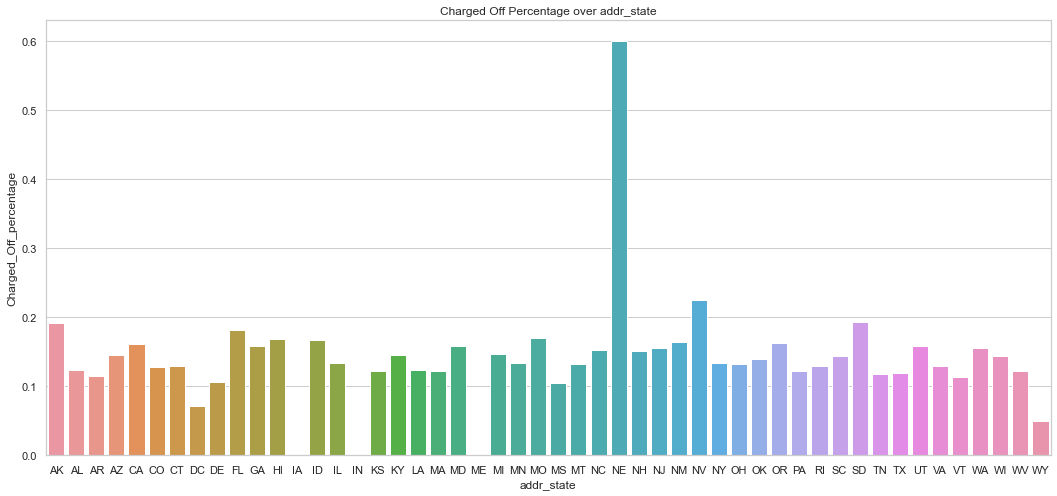

In [426]:
showchargedoffpropation(df,'addr_state')

NE ,NV states are contributing more to the Charged off Loans

dti (Continous Variable)


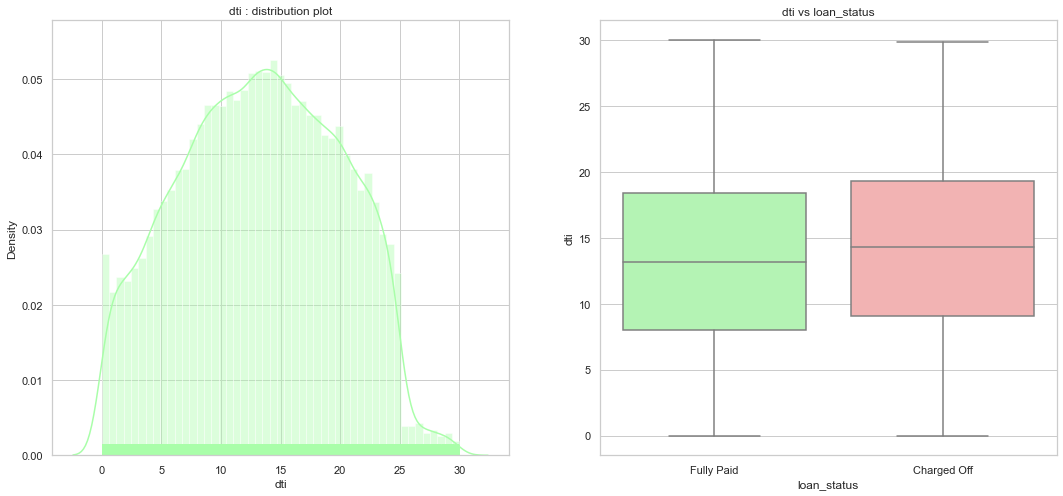

In [429]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(df["dti"],hist=True,rug=True,kde=True,ax=ax[0])
ax[0].set_title('dti : distribution plot')

sns.boxplot(data=df,y='dti',x='loan_status',ax=ax[1])
ax[1].set_title('dti vs loan_status')
plt.show()

dti is distributed over a range of 0 to 30 and having max from 10 to 20 ( 25 percentile to 75 percentile)

as in second graph dti for fully paid and charged off have same infullence,

slightly higher dti tends to high chance of charged off



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


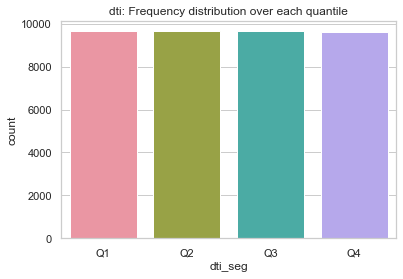

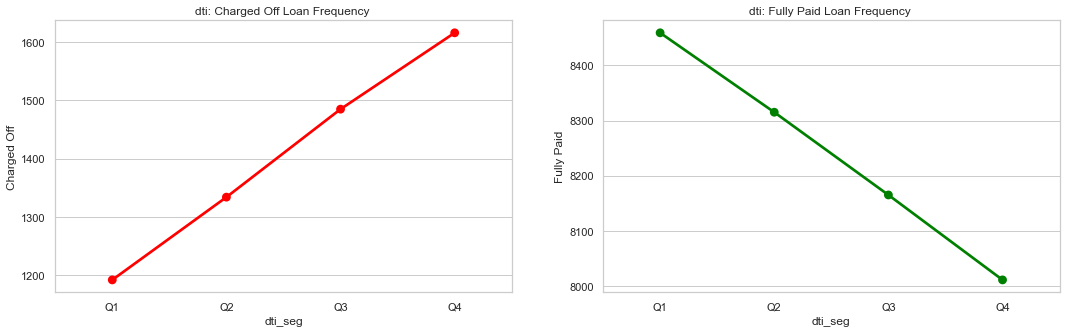

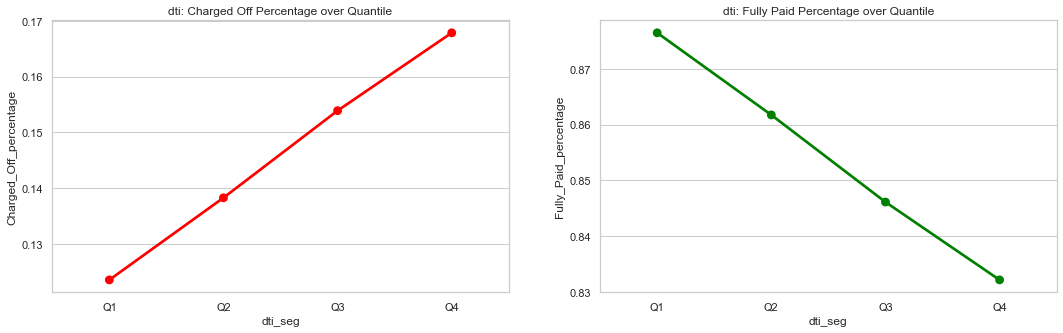

In [431]:
segmentedUnivariateAnalysis(df,'dti')

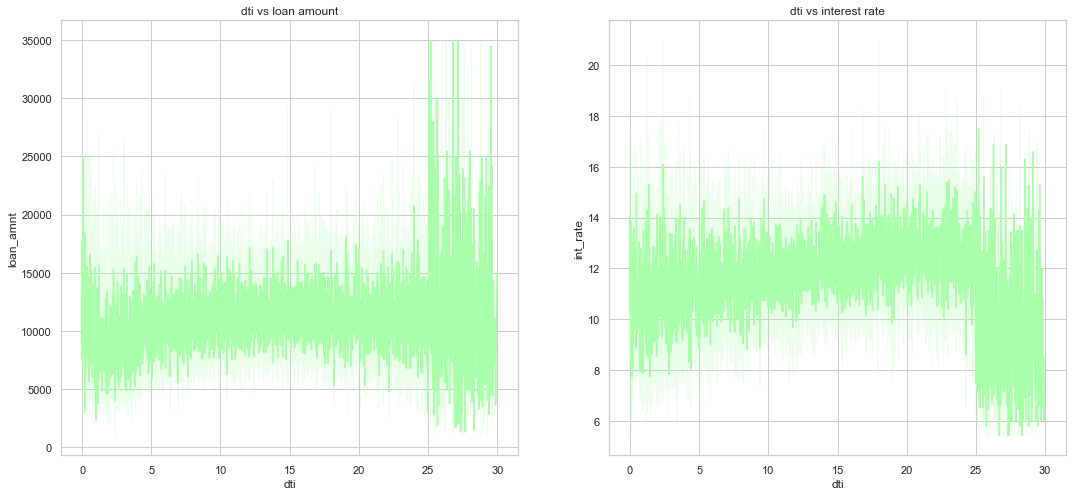

In [448]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.lineplot(data=df,x='dti',y='loan_amnt',ax=ax[0])
ax[0].set_title('dti vs loan amount')

sns.lineplot(data=df,x='dti',y='int_rate',ax=ax[1])
ax[1].set_title('dti vs interest rate')
plt.show()

Higher dti tends to higher chances of Loans charged off and lower chances of Fully Paid

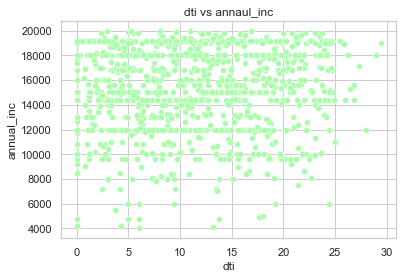

In [436]:
sns.scatterplot(data=df[df['annual_inc']<20000],x='dti',y='annual_inc')
plt.title('dti vs annaul_inc')
plt.show()

No impact of dti on annual income

# Recommendations

Higher ratio of Debt to Income draws more defaulting.

Small Business is more risker.

Purpose compared to others Loan Grades F & G are more riskier.

Applicants who are drawing higher Annual Income are less riskier compared to lower income group

Above all features have to be checked  in determining the risk factpor of applicant
